In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
data=pd.read_csv("EmployeeAttrition.csv")
data.head() #Categorical Dataset

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating,Attrition
0,College,High,2,1102,5993.0,8,8,6,4,0,5,0,Excellent,Yes
1,Below College,Medium,2,279,5130.0,1,10,10,7,1,7,3,Outstanding,No
2,College,Medium,1,1373,2090.0,6,7,0,0,0,0,3,Excellent,Yes
3,Master,High,1,1392,2909.0,1,8,8,7,3,0,3,Excellent,No
4,Below College,High,1,591,3468.0,9,6,2,2,2,2,3,Excellent,No


The target data 'Attrition' is a categorical data.So, given dataset is categorical dataset.
In categorical dataset we can perform the following algorithms:-
    1. Logistic Regression.
    2. Decision Tree Classification.
    3. Random Forest Classifier.
    4. Hyper Parameter Tuning.
    5. KNN -K Nearest Neighbour Classifier.


# Exploratory data analysis(EDA)

In [3]:
data.shape 

(1470, 14)

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
Education                  1470 non-null object
JobInvolvement             1466 non-null object
JobLevel                   1470 non-null int64
DailyRate(USD)             1470 non-null int64
MonthlyIncome(USD)         1466 non-null float64
NoofCompaniesWorked        1470 non-null int64
TotalWorkingYears          1470 non-null int64
YearsAtCompany             1470 non-null int64
YearsInCurrentRole         1470 non-null int64
YearsSinceLastPromotion    1470 non-null int64
YearsWithCurrentManager    1470 non-null int64
TrainingTimesLastYear      1470 non-null int64
PerformanceRating          1470 non-null object
Attrition                  1470 non-null object
dtypes: float64(1), int64(9), object(4)
memory usage: 160.9+ KB


In [5]:
data.describe()

,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear
count,1470.000000,1470.000000,1466.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.063946,802.485714,6503.751023,2.693197,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,1.106940,403.509100,4710.393079,2.498009,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.000000,102.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,465.000000,2911.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,2.000000,802.000000,4919.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,3.000000,1157.000000,8379.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,5.000000,1499.000000,19999.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


# Finding null values in dataset

In [6]:
data.isnull().sum() 

Education                  0
JobInvolvement             4
JobLevel                   0
DailyRate(USD)             0
MonthlyIncome(USD)         4
NoofCompaniesWorked        0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
TrainingTimesLastYear      0
PerformanceRating          0
Attrition                  0
dtype: int64

# Handling Null Values

In [7]:
data['JobInvolvement'].fillna(data['JobInvolvement'].mode()[0],inplace=True) 

In [8]:
data['MonthlyIncome(USD)'].fillna(data['MonthlyIncome(USD)'].mean(),inplace=True)

In [9]:
data.isnull().sum()

Education                  0
JobInvolvement             0
JobLevel                   0
DailyRate(USD)             0
MonthlyIncome(USD)         0
NoofCompaniesWorked        0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
TrainingTimesLastYear      0
PerformanceRating          0
Attrition                  0
dtype: int64

In [10]:
data.columns 

Index(['Education', 'JobInvolvement', 'JobLevel', 'DailyRate(USD)',
       'MonthlyIncome(USD)', 'NoofCompaniesWorked', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'TrainingTimesLastYear', 'PerformanceRating',
       'Attrition'],
      dtype='object')

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print("Before Encoding\n",data['Education'].value_counts())
data['Education']=le.fit_transform(data['Education'])
print("After Encoding\n",data['Education'].value_counts())

Before Encoding
 Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64
After Encoding
 0    572
4    398
2    282
1    170
3     48
Name: Education, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print("Before Encoding\n",data['JobInvolvement'].value_counts())
data['JobInvolvement']=le.fit_transform(data['JobInvolvement'])
print("After Encoding\n",data['JobInvolvement'].value_counts())

Before Encoding
 High         871
Medium       373
Very High    144
Low           82
Name: JobInvolvement, dtype: int64
After Encoding
 0    871
2    373
3    144
1     82
Name: JobInvolvement, dtype: int64


In [13]:
print("Before Encoding\n",data['PerformanceRating'].value_counts())
data['PerformanceRating']=le.fit_transform(data['PerformanceRating'])
print("After Encoding\n",data['PerformanceRating'].value_counts())

Before Encoding
 Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64
After Encoding
 0    1244
1     226
Name: PerformanceRating, dtype: int64


In [14]:
print("Before Encoding\n",data['Attrition'].value_counts())
data['Attrition']=le.fit_transform(data['Attrition'])
print("After Encoding\n",data['Attrition'].value_counts())

Before Encoding
 No     1233
Yes     237
Name: Attrition, dtype: int64
After Encoding
 0    1233
1     237
Name: Attrition, dtype: int64


# independent and dependent data

In [15]:
x=data.iloc[:,:13] #independent data
x.head(2)

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating
0,2,0,2,1102,5993.0,8,8,6,4,0,5,0,0
1,1,2,2,279,5130.0,1,10,10,7,1,7,3,1


In [16]:
y=data.iloc[:,[13]] #dependent data
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


# Train,Test and Split 

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Feature Selection

In [18]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x_train,y_train)
mi

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.        , 0.00719723, 0.01656732, 0.01540451, 0.04156646,
       0.0046572 , 0.03930456, 0.03457052, 0.00826747, 0.00968216,
       0.02357529, 0.        , 0.        ])

In [19]:
MI=pd.Series(mi)
MI.index=x_train.columns
MI.sort_values(ascending=False)

MonthlyIncome(USD)         0.041566
TotalWorkingYears          0.039305
YearsAtCompany             0.034571
YearsWithCurrentManager    0.023575
JobLevel                   0.016567
DailyRate(USD)             0.015405
YearsSinceLastPromotion    0.009682
YearsInCurrentRole         0.008267
JobInvolvement             0.007197
NoofCompaniesWorked        0.004657
PerformanceRating          0.000000
TrainingTimesLastYear      0.000000
Education                  0.000000
dtype: float64

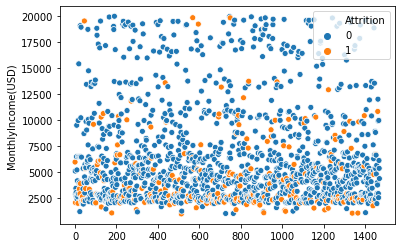

In [20]:
sns.scatterplot(data.index,data['MonthlyIncome(USD)'],hue=data['Attrition'])

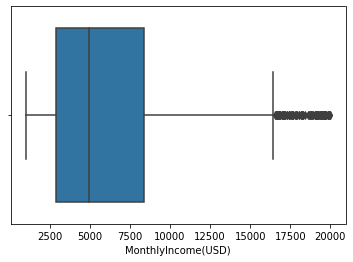

In [21]:
sns.boxplot(data['MonthlyIncome(USD)'],hue=data['Attrition'])

In [22]:
y=data.iloc[:,[13]]
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [23]:
data['Attrition'].value_counts() #unbalanced

0    1233
1     237
Name: Attrition, dtype: int64

# Under Sampling

In [24]:
data_class_0=data[data['Attrition']==0]
data_class_1=data[data['Attrition']==1]
print(data_class_0.shape)
print(data_class_1.shape)

(1233, 14)
(237, 14)


In [25]:
data_class_0_under=data_class_0.sample(237)
print(data_class_0_under.shape)

(237, 14)


In [26]:
data_under=pd.concat([data_class_0_under,data_class_1],axis=0)
print(data_under.shape)
data_under['Attrition'].value_counts()

(474, 14)


1    237
0    237
Name: Attrition, dtype: int64

In [27]:
x1=data_under.iloc[:,[2,4,6,7,10]]

In [28]:
y1=data_under.iloc[:,[13]]

# Build model- Logistic Regression(on under sampled data)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
logr1=LogisticRegression()
logr1.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_predlog1=logr1.predict(x_test)
y_predlog1

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1])

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_predlog1,y_test)

array([[25,  8],
       [25, 37]], dtype=int64)

In [32]:
print(classification_report(y_predlog1,y_test))

              precision    recall  f1-score   support

           0       0.50      0.76      0.60        33
           1       0.82      0.60      0.69        62

    accuracy                           0.65        95
   macro avg       0.66      0.68      0.65        95
weighted avg       0.71      0.65      0.66        95



In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predlog1)


0.6526315789473685

# Over Sampling

In [34]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [35]:
data_class_0=data[data['Attrition']==0]
data_class_1=data[data['Attrition']==1]
print(data_class_0.shape)
print(data_class_1.shape)

(1233, 14)
(237, 14)


In [36]:
data_1_over=data_class_1.sample(1233,replace=True)
print(data_1_over.shape)

(1233, 14)


In [37]:
data_over=pd.concat([data_1_over,data_class_0],axis=0)
print(data_over.shape)
data_over['Attrition'].value_counts()

(2466, 14)


1    1233
0    1233
Name: Attrition, dtype: int64

In [38]:
x2=data_over.iloc[:,[2,4,6,7,10]]

In [39]:
y2=data_over.iloc[:,[13]]

# Build model- Logistic Regression(on over sampled data)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
logr2=LogisticRegression()
logr2.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_predlog2=logr2.predict(x_test)
y_predlog2

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_predlog2,y_test)

array([[140,  73],
       [104, 177]], dtype=int64)

In [43]:
print(classification_report(y_predlog2,y_test))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       213
           1       0.71      0.63      0.67       281

    accuracy                           0.64       494
   macro avg       0.64      0.64      0.64       494
weighted avg       0.65      0.64      0.64       494



In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predlog2)

0.6417004048582996

# Build model- Decision Tree Classification(on under sampled data)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier()
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
y_preddtc1=dtc1.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_preddtc1,y_test)

array([[26, 14],
       [24, 31]], dtype=int64)

In [48]:
print(classification_report(y_preddtc1,y_test))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58        40
           1       0.69      0.56      0.62        55

    accuracy                           0.60        95
   macro avg       0.60      0.61      0.60        95
weighted avg       0.62      0.60      0.60        95



In [49]:
accuracy_score(y_preddtc1,y_test)

0.6

In [50]:
y_prd=dtc1.predict(x_train)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_prd,y_train)

array([[187,   0],
       [  0, 192]], dtype=int64)

In [52]:
accuracy_score(y_prd,y_train)

1.0

# Build model- Decision Tree Classification(on over sampled data)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeClassifier
dtc2=DecisionTreeClassifier()
dtc2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
y_preddtc2=dtc2.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_preddtc2,y_test)

array([[191,   4],
       [ 53, 246]], dtype=int64)

In [56]:
print(classification_report(y_preddtc2,y_test))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       195
           1       0.98      0.82      0.90       299

    accuracy                           0.88       494
   macro avg       0.88      0.90      0.88       494
weighted avg       0.90      0.88      0.89       494



In [57]:
y_prdt=dtc2.predict(x_train)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_prdt,y_train)

array([[986,   0],
       [  3, 983]], dtype=int64)

In [59]:
accuracy_score(y_prdt,y_train)

0.9984787018255578

# Random Forest Classifier (on under sampled data)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(379, 5)
(379, 1)
(95, 5)
(95, 1)


In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier()
rfc1.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_test.head()

,Attrition
937,0
894,0
69,1
1377,0
1213,1


In [63]:
y_pred=rfc1.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1])

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.6526315789473685

In [65]:
confusion_matrix(y_test,y_pred)

array([[34, 16],
       [17, 28]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        50
           1       0.64      0.62      0.63        45

    accuracy                           0.65        95
   macro avg       0.65      0.65      0.65        95
weighted avg       0.65      0.65      0.65        95



# Random Forest Classifier (on over sampled data)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1972, 5)
(1972, 1)
(494, 5)
(494, 1)


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc2=RandomForestClassifier()
rfc2.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_test.head()

,Attrition
838,1
479,1
658,0
111,1
1201,1


In [70]:
y_pred=rfc2.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.9048582995951417

In [72]:
confusion_matrix(y_test,y_pred)

array([[204,  40],
       [  7, 243]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       244
           1       0.86      0.97      0.91       250

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494



# Hyper Parameter Tuning(on under sampled data)

In [78]:
from sklearn.model_selection import GridSearchCV
grid_param={ 
    'criterion':['gini','entropy'],
    'max_depth' : [ 5,6,7] 
}
grid_search=GridSearchCV(estimator=dtc1,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7]},
             pre_dispatch='2*

In [79]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [80]:
dtc1_hyper=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc1_hyper.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
y_pred_hyper=dtc1_hyper.predict(x_test)
accuracy_score(y_test,y_pred_hyper)

0.6882591093117408

In [82]:
confusion_matrix(y_pred,y_test)

array([[204,   7],
       [ 40, 243]], dtype=int64)

In [83]:
confusion_matrix(y_pred_hyper,y_test)

array([[181,  91],
       [ 63, 159]], dtype=int64)

# Hyper Parameter Tuning(on over sampled data)

In [84]:
from sklearn.model_selection import GridSearchCV
grid_param={ 
    'criterion':['gini','entropy'],
    'max_depth' : [ 5,6,7] 
}
grid_search=GridSearchCV(estimator=dtc2,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7]},
             pre_dispatch='2*

In [85]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [86]:
dtc2_hyper=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc2_hyper.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
y_pred_hyper=dtc2_hyper.predict(x_test)
accuracy_score(y_test,y_pred_hyper)

0.6882591093117408

In [88]:
confusion_matrix(y_pred,y_test)

array([[204,   7],
       [ 40, 243]], dtype=int64)

In [89]:
confusion_matrix(y_pred_hyper,y_test)

array([[181,  91],
       [ 63, 159]], dtype=int64)

# Build model- KNN-K Nearest Classifier(on under sampled data)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
y_pred1=knn1.predict(x_test)
y_pred1

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0])

In [92]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_pred1,y_test)

array([[21, 15],
       [29, 30]], dtype=int64)

In [93]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.42      0.58      0.49        36
           1       0.67      0.51      0.58        59

    accuracy                           0.54        95
   macro avg       0.54      0.55      0.53        95
weighted avg       0.57      0.54      0.54        95



In [94]:
y_prd=knn1.predict(x_train)

In [95]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_prd,y_train)

array([[136,  45],
       [ 51, 147]], dtype=int64)

In [96]:
accuracy_score(y_prd,y_train)

0.7467018469656992

# Build model- KNN-K Nearest Classifier(on over sampled data)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=0)
knn2=KNeighborsClassifier()
knn2.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [98]:
y_pred2=knn2.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

In [99]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_pred2,y_test)

array([[155,  20],
       [ 89, 230]], dtype=int64)

In [100]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.64      0.89      0.74       175
           1       0.92      0.72      0.81       319

    accuracy                           0.78       494
   macro avg       0.78      0.80      0.77       494
weighted avg       0.82      0.78      0.78       494



In [101]:
y_prd=knn2.predict(x_train)

In [102]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_prd,y_train)

array([[701,  29],
       [288, 954]], dtype=int64)

In [103]:
accuracy_score(y_prd,y_train)

0.8392494929006086